# OCR By Machine Learning

In [5]:
import numpy as np
import cv2
import csv
import glob
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import joblib
from sklearn.svm import SVC
from sklearn import metrics
from commonFunctions import *
%matplotlib inline

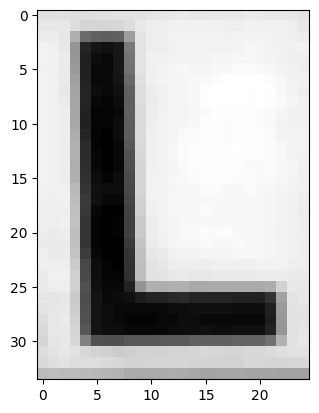

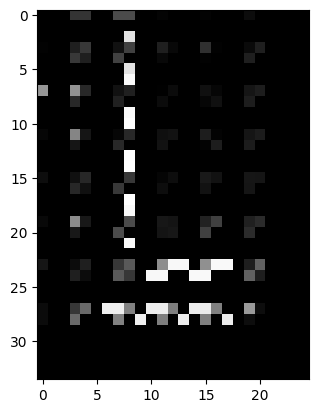

In [2]:
img = cv2.imread('./CharacterImages/L0.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()
hog = Hog_descriptor(img, cell_size=4, bin_size=9)
vector, image = hog.extract()
plt.imshow(image, cmap='gray')
plt.show()

In [3]:
arr = ["0","1","2","3","4","5","6","7","8","9","A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]

In [4]:
data=[]
hog_features = []
for label in arr:
    dirList = glob.glob("letter Dataset/"+str(label)+"/*.jpg")
    
    for img_path in dirList:
        im= cv2.imread(img_path)
        im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
        im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)
        roi= cv2.resize(im_gray,(28,28), interpolation=cv2.INTER_AREA)
        
        rows, cols = roi.shape
        
        ## Add pixel one by one into data array
        for i in range(rows):
            for j in range(cols):
                k =roi[i,j]
                if k>100:
                    k=1
                else:
                    k=0
        
        hog = Hog_descriptor(roi, cell_size=4, bin_size=9)
        vector, image = hog.extract()
        vec = np.array(vector)
        hog_features.append(vec.flatten())
        data.append(label)

In [5]:
train_x,test_x,train_y,test_y = train_test_split(hog_features,data, test_size = 0.2)

In [6]:
classifier=SVC(kernel="linear", random_state=6)
classifier.fit(train_x,train_y)
joblib.dump(classifier, "model/char_rec")

['model/char_rec']

In [7]:
prediction=classifier.predict(test_x)
print("Accuracy= ",metrics.accuracy_score(prediction, test_y))
print("Precision= ",metrics.precision_score(prediction, test_y, average='weighted'))
print("Recall= ",metrics.recall_score(prediction, test_y, average='weighted'))
print("F1 Score= ",metrics.f1_score(prediction, test_y, average='weighted'))
print("Confusion Matrix= ",metrics.confusion_matrix(prediction, test_y))
print("Classification Report= ",metrics.classification_report(prediction, test_y))

Accuracy=  0.9998591549295774
Precision=  0.9998598962194217
Recall=  0.9998591549295774
F1 Score=  0.9998591781023665
Confusion Matrix=  [[216   0   0 ...   0   0   0]
 [  0 203   0 ...   0   0   0]
 [  0   0 206 ...   0   0   0]
 ...
 [  0   0   0 ... 204   0   0]
 [  0   0   0 ...   0 212   0]
 [  0   0   0 ...   0   0 177]]
Classification Report=                precision    recall  f1-score   support

           0       1.00      1.00      1.00       217
           1       1.00      1.00      1.00       203
           2       1.00      1.00      1.00       206
           3       1.00      1.00      1.00       216
           4       1.00      1.00      1.00       208
           5       1.00      1.00      1.00       198
           6       1.00      1.00      1.00       208
           7       1.00      1.00      1.00       202
           8       1.00      1.00      1.00       222
           9       1.00      1.00      1.00       207
           A       1.00      1.00      1.00       2

In [6]:
def read_img(img):
    im_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)
    roi= cv2.resize(im_gray,(28,28), interpolation=cv2.INTER_AREA)
    
    rows, cols = roi.shape
    
    ## Add pixel one by one into data array
    for i in range(rows):
        for j in range(cols):
            k =roi[i,j]
            if k>100:
                k=1
            else:
                k=0
    
        hog = Hog_descriptor(roi, cell_size=4, bin_size=9)
        vector, image = hog.extract()
        vec = np.array(vector)
        return vec.flatten()

In [2]:
model=joblib.load("model/char_rec")

In [16]:
im = cv2.imread("CharacterImages/L1.png")
hogTest = read_img(im)

Prediction: L
['L']
done


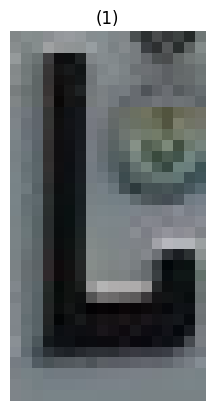

In [17]:
predictions  =model.predict([hogTest])
print("Prediction:",predictions[0])
# cv2.putText(im, "Prediction is: "+str(predictions[0]), (20,20), 0, 0.8,(0,255,0),2,cv2.LINE_AA)
print(predictions)
print("done")
show_images([im])

In [30]:
dirList = glob.glob("CharacterImages/*.png")
count = 0
for img_path in dirList:
    chars = img_path.split("\\")[-1]
    im= cv2.imread(img_path)
    imgHoG = read_img(im)
    predictions  =model.predict([imgHoG])
    if(predictions[0] == chars[0]):
        print("Prediction:",predictions[0])
        print("True Label:",chars[0])
        print("Correct")
        count += 1
    else:
        print("Prediction:",predictions[0])
        print("True Label:",chars[0])
        print("Incorrect")
print("correct:",count,"total:",len(dirList))
print("Accuracy:",count/len(dirList)*100,"%")

Prediction: 0
True Label: 0
Correct
Prediction: I
True Label: 1
Incorrect
Prediction: 1
True Label: 1
Correct
Prediction: 1
True Label: 1
Correct
Prediction: 2
True Label: 2
Correct
Prediction: 2
True Label: 2
Correct
Prediction: 2
True Label: 2
Correct
Prediction: 3
True Label: 3
Correct
Prediction: 3
True Label: 3
Correct
Prediction: 5
True Label: 5
Correct
Prediction: 5
True Label: 5
Correct
Prediction: 6
True Label: 6
Correct
Prediction: 7
True Label: 7
Correct
Prediction: 7
True Label: 7
Correct
Prediction: A
True Label: A
Correct
Prediction: B
True Label: B
Correct
Prediction: C
True Label: C
Correct
Prediction: D
True Label: D
Correct
Prediction: D
True Label: D
Correct
Prediction: E
True Label: E
Correct
Prediction: E
True Label: E
Correct
Prediction: G
True Label: G
Correct
Prediction: H
True Label: H
Correct
Prediction: A
True Label: J
Incorrect
Prediction: K
True Label: K
Correct
Prediction: K
True Label: K
Correct
Prediction: L
True Label: L
Correct
Prediction: L
True Label